# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( "petrol.csv" )
data.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
data.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [4]:
data.columns

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [6]:
data = remove_outlier(data, 'tax')
data = remove_outlier(data, ' income')
data = remove_outlier(data, ' highway')
data = remove_outlier(data, ' dl')
data = remove_outlier(data, ' consumption')

In [7]:
data.shape

(42, 5)

In [8]:
data.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [9]:
data.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.133841,-0.443926,-0.316342,-0.463247
income,-0.133841,1.000000,-0.076862,0.296002,-0.254464
highway,-0.443926,-0.076862,1.000000,0.133983,0.215182
dl,-0.316342,0.296002,0.133983,1.000000,0.549161
consumption,-0.463247,-0.254464,0.215182,0.549161,1.000000


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

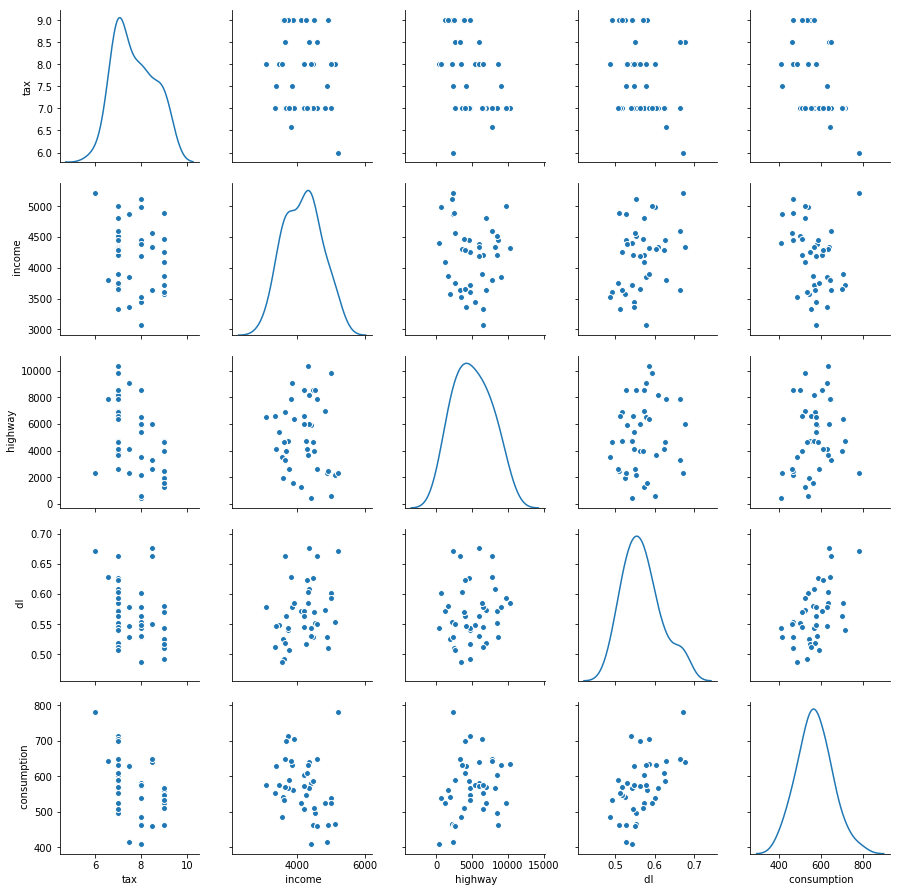

In [57]:
sns.pairplot(data , diag_kind='kde')

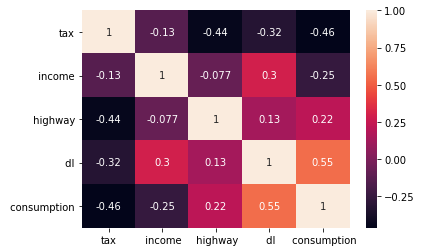

In [58]:
sns.heatmap( data.corr(), annot=True)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [37]:
X = data[[' dl','tax']]
Y = data[[' consumption']]

In [38]:
X.head(5)

,dl,tax
0,0.525,9.0
1,0.572,9.0
2,0.580,9.0
3,0.529,7.5
4,0.544,8.0


In [39]:
Y.head(5)

,consumption
0,541
1,524
2,561
3,414
4,410


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [40]:
from sklearn.linear_model import LinearRegression

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [41]:
test_size = 0.20 # taking 80:20 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [42]:
X_train.shape

(33, 2)

In [43]:
X_test.shape

(9, 2)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [44]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print("Intercept: "+str(regression_model.intercept_))
print("Coefficient: "+str(regression_model.coef_))

Intercept: [367.18022524]
Coefficient: [[765.61433723 -30.51966834]]


# R-Square 

In [45]:
predictedConsumption = regression_model.predict(X_train)

In [46]:
from sklearn import metrics
mse = metrics.mean_squared_error(predictedConsumption, y_train)
mse

3577.9737696031298

In [47]:
rmse = np.sqrt(mse)
rmse

59.816166456929764

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [48]:
print("Training Score: "+str(regression_model.score(X_train, y_train)))

Training Score: 0.4320275870179877


In [49]:
print("Test Score: "+str(regression_model.score(X_test, y_test)))

Test Score: 0.2529411404166674


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [50]:
X = data[[' dl','tax',' income',' highway']]
Y = data[[' consumption']]

In [51]:
test_size = 0.20 # taking 80:20 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [52]:
X_train.shape

(33, 4)

In [53]:
y_train.shape

(33, 1)

# Question 9: Print the coefficients of the multilinear regression model

In [54]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print("Intercept: "+str(regression_model.intercept_))
print("Coefficient: "+str(regression_model.coef_))

Intercept: [622.20386708]
Coefficient: [[ 9.80399184e+02 -4.18065762e+01 -6.55557143e-02 -3.29028951e-03]]


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [55]:
print("Training Score: "+str(regression_model.score(X_train, y_train)))

Training Score: 0.595108086503821


In [56]:
print("Test Score: "+str(regression_model.score(X_test, y_test)))

Test Score: 0.5874093116345042


R-square is dependend on the number of variables used in the mode. R-square value increases with the increare in the number of independent variables.